# Legally Operating Businesses in New York City

#### Name: Amrit Laxmanasa Shidling
#### Student Id: x21198951
#### Email Id: x21198951@student.ncirl.ie

In [1]:
!pip install pymongo

In [2]:
import pymongo
from pymongo import MongoClient
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

## I. Connection Information

### Credentials and URL for API Endpoint

In [3]:
API_KEY = 'aojonrfnp3uqfyu6mw1kgc8o'
API_SECRET = '4z00xbn5dlki7wygoz9suh3rhq8s4ymun1c4frkkepxtf4en6m'
URL = 'https://data.cityofnewyork.us/resource/w7w3-xahh.json?$limit=279514&$offset=0'

### NCI Open Stack Private Cloud Instance IP

In [4]:
HOST = '87.44.4.77'

### Mongo Database Connection Credentials and Port

In [5]:
USER_NAME = 'dap_project'
USER_PASSWORD = 'Dap_12345'
PORT = 27017

### Function to fetch the Semistructured Licensed Business Data Using API Key and Secret

In [6]:
def fetching_licensed_businesses_from_api():
    headers = {
        'X-Api-Key': API_KEY,
        'X-Api-Secret': API_SECRET
    }
    
    response = requests.get(URL, headers=headers)
    nyc_licensed_business_data = {}
    if response.status_code == 200:
        nyc_licensed_business_data = response.json()
    else:
        print('Request failed with status code: ', response.status_code)
    return nyc_licensed_business_data

### Function to Store JSON based Licensed Business Data to Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [7]:
def insert_nyc_business_data_to_db(nyc_licensed_business_data, database_name, collection_name):
    client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/{database_name}')
    db = client[database_name]
    newyork_businesses_collection = db[collection_name]
    newyork_businesses_collection.drop()
    result = newyork_businesses_collection.insert_many(nyc_licensed_business_data)
    client.close()

### Function to Fetch Licensed Business Data from Mongo DB which is hosted in NCI Private Cloud Ubuntu Machine

In [8]:
def fetch_nyc_business_data_from_db():
    client = MongoClient(f'mongodb://{USER_NAME}:{USER_PASSWORD}@{HOST}:{PORT}/newyork_businesses_db')
    db = client['newyork_businesses_db']
    newyork_businesses_collection = db['newyork_businesses']
    nyc_licensed_business_documents = newyork_businesses_collection.find({ "license_creation_date": { "$gte": "2013-01-01T00:00:00.000" } })
#     client1.close()
    return pd.DataFrame(list(nyc_licensed_business_documents))

In [9]:
nyc_licensed_business_documents = fetching_licensed_businesses_from_api()

In [10]:
insert_nyc_business_data_to_db(nyc_licensed_business_documents, 'newyork_businesses_db', 'newyork_businesses')

In [11]:
nyc_licensed_business_df = fetch_nyc_business_data_from_db()

In [12]:
df = nyc_licensed_business_df

In [13]:

nyc_licensed_business_df = df

## II. Exploratory Data Analysis

In [14]:
nyc_licensed_business_df.head()

,_id,license_nbr,license_type,lic_expir_dd,license_status,license_creation_date,industry,business_name,address_city,address_state,...,longitude,latitude,location,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,business_name_2,address_street_name_2
0,6442e7cdd0f7d552f21b6576,2103411-DCA,Individual,2024-03-31T00:00:00.000,Active,2022-01-11T00:00:00.000,Sightseeing Guide,"Nieciak, Joseph",BROOKLYN,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6442e7cdd0f7d552f21b6577,2060087-DCA,Individual,2024-03-31T00:00:00.000,Active,2017-10-31T00:00:00.000,Sightseeing Guide,"Arcaro, Tyler",NEW YORK,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6442e7cdd0f7d552f21b6578,2105486-DCA,Individual,2023-04-30T00:00:00.000,Active,2022-04-22T00:00:00.000,Pedicab Driver,"RADZHABOV, ABDURAKHIM",BROOKLYN,NY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6442e7cdd0f7d552f21b6579,2078026-DCA,Individual,2024-03-31T00:00:00.000,Active,2018-09-11T00:00:00.000,Sightseeing Guide,"HESSE, DAPHNEE",Vancouver,British Columbia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6442e7cdd0f7d552f21b657a,2057801-DCA,Individual,2019-02-28T00:00:00.000,Inactive,2017-09-01T00:00:00.000,Home Improvement Salesperson,"ESCOBAR, KEVIN",CHESTER,PA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
nyc_licensed_business_df.shape

(106129, 33)

In [16]:
nyc_licensed_business_df.columns

Index(['_id', 'license_nbr', 'license_type', 'lic_expir_dd', 'license_status',
       'license_creation_date', 'industry', 'business_name', 'address_city',
       'address_state', 'address_zip', 'address_building',
       'address_street_name', 'contact_phone', 'address_borough', 'detail',
       'community_board', 'council_district', 'bin', 'bbl', 'nta',
       'census_tract', 'detail_2', 'longitude', 'latitude', 'location',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih', 'business_name_2',
       'address_street_name_2'],
      dtype='object')

In [17]:
nyc_licensed_business_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106129 entries, 0 to 106128
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   _id                          106129 non-null  object
 1   license_nbr                  106129 non-null  object
 2   license_type                 106129 non-null  object
 3   lic_expir_dd                 92196 non-null   object
 4   license_status               106129 non-null  object
 5   license_creation_date        106129 non-null  object
 6   industry                     106129 non-null  object
 7   business_name                106101 non-null  object
 8   address_city                 105800 non-null  object
 9   address_state                105756 non-null  object
 10  address_zip                  105759 non-null  object
 11  address_building             68393 non-null   object
 12  address_street_name          68761 non-null   object
 13  contact_phone 

In [18]:
nyc_licensed_business_df.isnull().sum()

_id                                 0
license_nbr                         0
license_type                        0
lic_expir_dd                    13933
license_status                      0
license_creation_date               0
industry                            0
business_name                      28
address_city                      329
address_state                     373
address_zip                       370
address_building                37736
address_street_name             37368
contact_phone                   43732
address_borough                 37550
detail                          44274
community_board                 45511
council_district                45476
bin                             46857
bbl                             46859
nta                             66698
census_tract                    66699
detail_2                        88922
longitude                       44683
latitude                        44683
location                        44683
:@computed_r

In [19]:
nyc_licensed_business_df.isna().mean() * 100


_id                             0.000000
license_nbr                     0.000000
license_type                    0.000000
lic_expir_dd                   13.128363
license_status                  0.000000
license_creation_date           0.000000
industry                        0.000000
business_name                   0.026383
address_city                    0.310000
address_state                   0.351459
address_zip                     0.348632
address_building               35.556728
address_street_name            35.209980
contact_phone                  41.206456
address_borough                35.381470
detail                         41.717156
community_board                42.882718
council_district               42.849739
bin                            44.150986
bbl                            44.152871
nta                            62.846159
census_tract                   62.847101
detail_2                       83.786712
longitude                      42.102536
latitude        

In [20]:
#Dropping columsn which are irrelevent and have more than 50% of missing values as imputation will be inappropriate in this case
nyc_licensed_business_df = nyc_licensed_business_df.drop(['_id','contact_phone', 'detail', 'bin', 'bin', 'nta', 'census_tract', 'detail_2', 
                               'location', ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer', 
                               ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q', ':@computed_region_sbqj_enih', 
                               'business_name_2', 'address_street_name_2','bbl','community_board','council_district','community_board'], axis = 1)

In [21]:
nyc_licensed_business_df.rename(columns={'license_nbr': 'license_number', 'lic_expir_dd': 'license_expiry_date'}, inplace = True)

In [22]:
nyc_licensed_business_df.head()

,license_number,license_type,license_expiry_date,license_status,license_creation_date,industry,business_name,address_city,address_state,address_zip,address_building,address_street_name,address_borough,longitude,latitude
0,2103411-DCA,Individual,2024-03-31T00:00:00.000,Active,2022-01-11T00:00:00.000,Sightseeing Guide,"Nieciak, Joseph",BROOKLYN,NY,11214,NaN,NaN,NaN,NaN,NaN
1,2060087-DCA,Individual,2024-03-31T00:00:00.000,Active,2017-10-31T00:00:00.000,Sightseeing Guide,"Arcaro, Tyler",NEW YORK,NY,10028,NaN,NaN,NaN,NaN,NaN
2,2105486-DCA,Individual,2023-04-30T00:00:00.000,Active,2022-04-22T00:00:00.000,Pedicab Driver,"RADZHABOV, ABDURAKHIM",BROOKLYN,NY,11214,NaN,NaN,NaN,NaN,NaN
3,2078026-DCA,Individual,2024-03-31T00:00:00.000,Active,2018-09-11T00:00:00.000,Sightseeing Guide,"HESSE, DAPHNEE",Vancouver,British Columbia,V6Z1C,NaN,NaN,NaN,NaN,NaN
4,2057801-DCA,Individual,2019-02-28T00:00:00.000,Inactive,2017-09-01T00:00:00.000,Home Improvement Salesperson,"ESCOBAR, KEVIN",CHESTER,PA,19013,NaN,NaN,NaN,NaN,NaN


In [23]:
nyc_licensed_business_df.isna().mean() * 100

license_number            0.000000
license_type              0.000000
license_expiry_date      13.128363
license_status            0.000000
license_creation_date     0.000000
industry                  0.000000
business_name             0.026383
address_city              0.310000
address_state             0.351459
address_zip               0.348632
address_building         35.556728
address_street_name      35.209980
address_borough          35.381470
longitude                42.102536
latitude                 42.102536
dtype: float64

In [24]:
# nyc_licensed_business_df.describe()

## III. Missing Values Analysing and Cleaning

### 1. Analyzing license_number column

In [25]:
nyc_licensed_business_df['license_number'].isnull().sum()

0

In [26]:
len(nyc_licensed_business_df['license_number'].unique())

106128

In [27]:
len(nyc_licensed_business_df['license_number'])

106129

In [28]:
#There is one record which is repeated we can remove it 
duplicates = nyc_licensed_business_df.duplicated(subset='license_number', keep=False)
nyc_licensed_business_df[duplicates]

,license_number,license_type,license_expiry_date,license_status,license_creation_date,industry,business_name,address_city,address_state,address_zip,address_building,address_street_name,address_borough,longitude,latitude
40458,2003600-DCA,Business,2015-12-31T00:00:00.000,Inactive,2014-02-14T00:00:00.000,Laundry Jobber,35 Central Cleaners Corp,bronx,NY,10469,711,Lydig Ave,Bronx,NaN,NaN
91856,2003600-DCA,Business,2015-12-31T00:00:00.000,Inactive,2014-02-14T00:00:00.000,Laundry Jobber,35 Central Cleaners Corp,BRONX,NY,10462,711,LYDIG AVE,Bronx,-73.86716220468043,40.85449791792161


In [29]:
nyc_licensed_business_df = nyc_licensed_business_df.drop(40496)

In [30]:
nyc_licensed_business_df[duplicates]

,license_number,license_type,license_expiry_date,license_status,license_creation_date,industry,business_name,address_city,address_state,address_zip,address_building,address_street_name,address_borough,longitude,latitude
40458,2003600-DCA,Business,2015-12-31T00:00:00.000,Inactive,2014-02-14T00:00:00.000,Laundry Jobber,35 Central Cleaners Corp,bronx,NY,10469,711,Lydig Ave,Bronx,NaN,NaN
91856,2003600-DCA,Business,2015-12-31T00:00:00.000,Inactive,2014-02-14T00:00:00.000,Laundry Jobber,35 Central Cleaners Corp,BRONX,NY,10462,711,LYDIG AVE,Bronx,-73.86716220468043,40.85449791792161


### 2. Analyzing license_type column

In [31]:
nyc_licensed_business_df['license_type'].value_counts()

Business      68764
Individual    37364
Name: license_type, dtype: int64

In [32]:
nyc_licensed_business_df['license_type'].isnull().sum()

0

<AxesSubplot:>

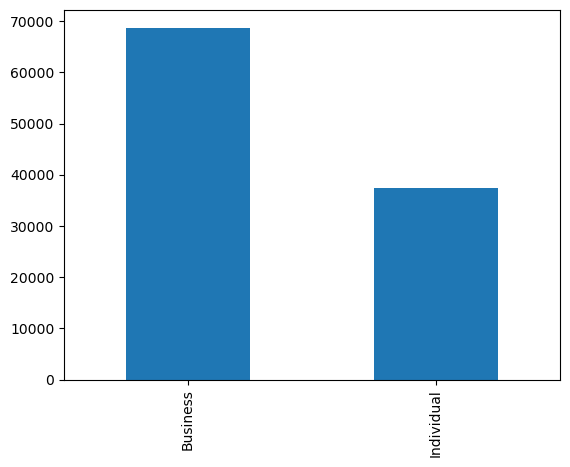

In [33]:
# Check the distribution of license types
nyc_licensed_business_df['license_type'].value_counts().plot(kind='bar')

### 3. Analyzing license_expiry_date column

In [34]:
nyc_licensed_business_df['license_expiry_date'].isnull().sum()

13933

In [35]:
nyc_licensed_business_df['license_creation_date'] = pd.to_datetime(nyc_licensed_business_df['license_creation_date'])
nyc_licensed_business_df['license_expiry_date'] = pd.to_datetime(nyc_licensed_business_df['license_expiry_date'], errors='coerce')

In [36]:
# Group the data by license type and calculate the median expiration date for each type
median_exp_dates = nyc_licensed_business_df.groupby('license_type')['license_expiry_date'].agg(lambda x: x.median(skipna=True))

# Replace missing license expiration dates with the median expiration date for the corresponding license type
nyc_licensed_business_df['license_expiry_date'] = np.where(nyc_licensed_business_df['license_expiry_date'].isna(),
                                                     nyc_licensed_business_df['license_type'].map(median_exp_dates),
                                                     nyc_licensed_business_df['license_expiry_date'])


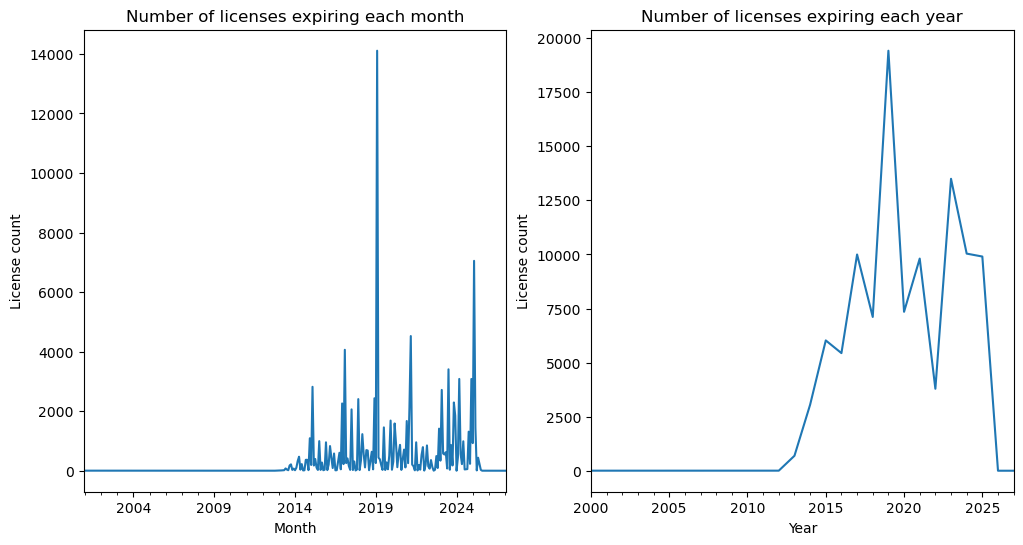

In [37]:
# Group the data by year and month of license expiration and count the number of licenses
expiry_count_by_month = nyc_licensed_business_df.groupby(nyc_licensed_business_df['license_expiry_date'].dt.to_period('M'))['license_number'].count()
expiry_count_by_year = nyc_licensed_business_df.groupby(nyc_licensed_business_df['license_expiry_date'].dt.to_period('Y'))['license_number'].count()

# Plot the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
expiry_count_by_month.plot(ax=ax1)
ax1.set_title('Number of licenses expiring each month')
ax1.set_xlabel('Month')
ax1.set_ylabel('License count')
expiry_count_by_year.plot(ax=ax2)
ax2.set_title('Number of licenses expiring each year')
ax2.set_xlabel('Year')
ax2.set_ylabel('License count')
plt.show()

In [38]:
nyc_licensed_business_df.isna().mean() * 100

license_number            0.000000
license_type              0.000000
license_expiry_date       0.000000
license_status            0.000000
license_creation_date     0.000000
industry                  0.000000
business_name             0.026383
address_city              0.310003
address_state             0.351462
address_zip               0.348636
address_building         35.557063
address_street_name      35.210312
address_borough          35.381803
longitude                42.102932
latitude                 42.102932
dtype: float64

### 4. Cleaning and Analyzing  license_status column

In [39]:
nyc_licensed_business_df['license_status'].isnull().sum()

0

In [40]:
nyc_licensed_business_df['license_status'].value_counts()

Inactive    77166
Active      28962
Name: license_status, dtype: int64

<AxesSubplot:ylabel='license_status'>

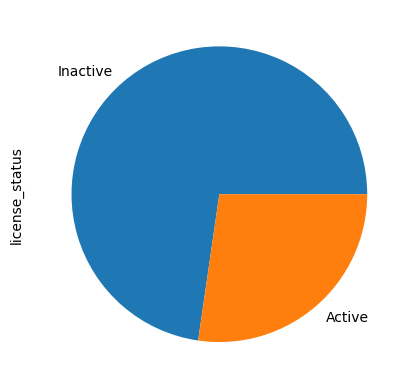

In [41]:
# Check the distribution of license statuses
nyc_licensed_business_df['license_status'].value_counts().plot(kind='pie')

### 5. Cleaning and Analyzing license_creation_date column

In [42]:
nyc_licensed_business_df['license_creation_date'].isnull().sum()

0

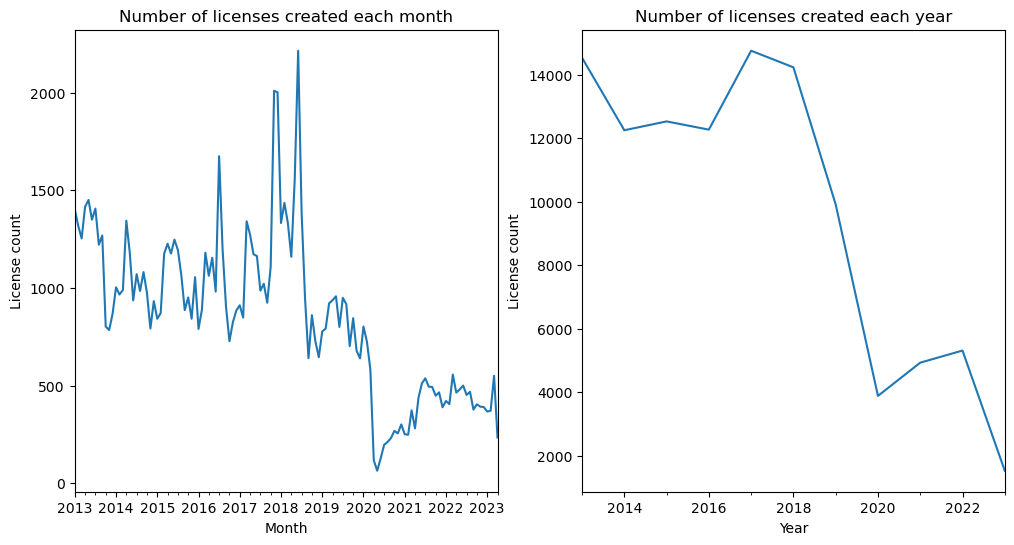

In [43]:
# Group the data by year and month of license expiration and count the number of licenses
created_count_by_month = nyc_licensed_business_df.groupby(nyc_licensed_business_df['license_creation_date'].dt.to_period('M'))['license_number'].count()
created_count_by_year = nyc_licensed_business_df.groupby(nyc_licensed_business_df['license_creation_date'].dt.to_period('Y'))['license_number'].count()

# Plot the graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
created_count_by_month.plot(ax=ax1)
ax1.set_title('Number of licenses created each month')
ax1.set_xlabel('Month')
ax1.set_ylabel('License count')
created_count_by_year.plot(ax=ax2)
ax2.set_title('Number of licenses created each year')
ax2.set_xlabel('Year')
ax2.set_ylabel('License count')
plt.show()

### 6. Cleaning and Analyzing industry column

In [44]:
nyc_licensed_business_df['industry'].isnull().sum()

0

In [45]:
nyc_licensed_business_df['industry'].value_counts()

Home Improvement Contractor     16967
Home Improvement Salesperson    15969
Tobacco Retail Dealer            9815
Electronics Store                6254
Secondhand Dealer - General      6122
                                ...  
Booting Company                    13
Tow Truck Exemption                13
Secondhand Dealer - Firearms        7
General Vendor Distributor          5
Commercial Lessor                   1
Name: industry, Length: 61, dtype: int64

<AxesSubplot:>

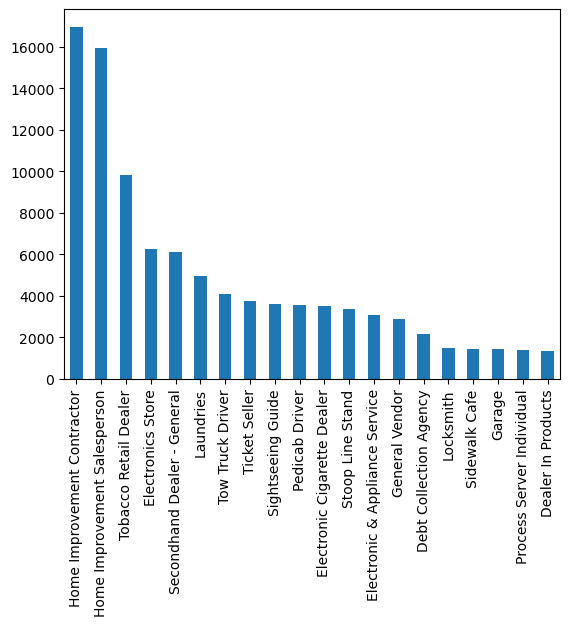

In [46]:
# Check the distribution of industries
nyc_licensed_business_df['industry'].value_counts().head(20).plot(kind='bar')

### 7. Cleaning and Analyzing business_name column

In [47]:
nyc_licensed_business_df['business_name'].isnull().sum()

28

In [48]:
# Writing the Unknown for the business_name where there is a null value
nyc_licensed_business_df['business_name'].fillna('Unknown', inplace=True)

In [49]:
nyc_licensed_business_df['business_name'].isnull().sum()

0


### 8. Cleaning and Analyzing address_city column

In [50]:
nyc_licensed_business_df['address_city'].value_counts()

BROOKLYN         26497
NEW YORK         18141
BRONX            14000
STATEN ISLAND     5387
JAMAICA           2794
                 ...  
NYC                  1
GRAHAMSVILLE         1
DEER ISLAND          1
Freeport             1
Sugar Land           1
Name: address_city, Length: 2228, dtype: int64

In [51]:
# Find duplicates in the address_city column with different cases
duplicates = nyc_licensed_business_df[nyc_licensed_business_df['address_city'].duplicated(keep=False)]

# Convert the address_city column to lowercase
duplicates['address_city_lower'] = duplicates['address_city'].str.lower()

# Convert the address_city column to uppercase
duplicates['address_city_upper'] = duplicates['address_city'].str.upper()

# Print the list of duplicate address_city values
print(duplicates[['address_city', 'address_city_lower', 'address_city_upper']].drop_duplicates())

          address_city address_city_lower address_city_upper
0             BROOKLYN           brooklyn           BROOKLYN
1             NEW YORK           new york           NEW YORK
4              CHESTER            chester            CHESTER
5              WANTAGH            wantagh            WANTAGH
6                BRONX              bronx              BRONX
...                ...                ...                ...
101081      WATER MILL         water mill         WATER MILL
101533        LOCKPORT           lockport           LOCKPORT
101535  JEFFERSON CITY     jefferson city     JEFFERSON CITY
102521    SADDLE RIVER       saddle river       SADDLE RIVER
105107   NORTH AUGUSTA      north augusta      NORTH AUGUSTA

[1212 rows x 3 columns]


In [52]:
# As there are values which are same but upper or lower which are considered as different. To avoid this we can convert to camel case all
nyc_licensed_business_df['address_city'] = nyc_licensed_business_df['address_city'].apply(lambda x: x.title() if isinstance(x, str) else x)

In [53]:
nyc_licensed_business_df['address_city'].isnull().sum()

329

In [54]:
def extract_city(business_name):
    if pd.isna(business_name):
        return np.nan
    else:
        parts = business_name.split(", ")
        if len(parts) > 1:
            return parts[-1]
        else:
            return np.nan
        
nyc_licensed_business_df['address_city'] = nyc_licensed_business_df.apply(
    lambda x: x['address_city'] if not pd.isna(x['address_city']) else extract_city(x['business_name']),
    axis=1
)


In [55]:
nyc_licensed_business_df['address_city'].isnull().sum()

15

In [56]:
nyc_licensed_business_df['address_city'] = nyc_licensed_business_df['address_city'].fillna(nyc_licensed_business_df['address_zip'])


In [57]:
nyc_licensed_business_df['address_city'].isnull().sum()

11

In [58]:
nyc_licensed_business_df['address_city'] = nyc_licensed_business_df['address_city'].fillna(nyc_licensed_business_df['address_city'].mode()[0])


In [59]:
nyc_licensed_business_df['address_city'].isnull().sum()

0

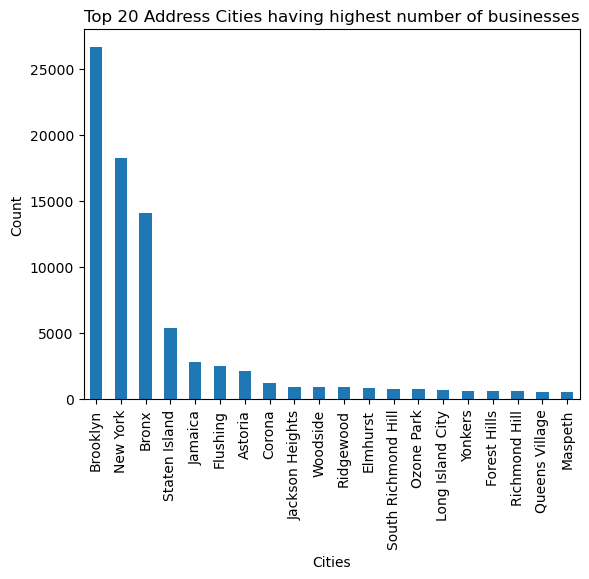

In [60]:

nyc_licensed_business_df['address_city'].value_counts().nlargest(20).plot(kind='bar')

plt.title('Top 20 Address Cities having highest number of businesses')
plt.xlabel('Cities')
plt.ylabel('Count')

# Show the plot
plt.show()


### 9. Cleaning and Analyzing address_state column

In [61]:
nyc_licensed_business_df[['address_state','address_city']]

,address_state,address_city
0,NY,Brooklyn
1,NY,New York
2,NY,Brooklyn
3,British Columbia,Vancouver
4,PA,Chester
...,...,...
106124,NY,Long Island City
106125,NY,Brooklyn
106126,NY,Brooklyn
106127,NY,Brooklyn


In [62]:
nyc_licensed_business_df['address_state'].isnull().sum()

373

In [63]:
grouped = nyc_licensed_business_df.groupby('address_city')

nyc_licensed_business_df['city_has_state'] = grouped['address_state'].transform(lambda x: ~x.isnull().all())

cities_with_state = nyc_licensed_business_df[nyc_licensed_business_df['city_has_state']]

print(cities_with_state['address_city'].unique())

['Brooklyn' 'New York' 'Vancouver' ... 'Dewitt' 'North Richland Hills'
 'Berkeley Lake']


In [64]:
nyc_licensed_business_df['address_state'] = nyc_licensed_business_df.groupby('address_city')['address_state'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [65]:
nyc_licensed_business_df['address_state'].isnull().sum()

327

In [66]:
nyc_licensed_business_df['address_state'] = nyc_licensed_business_df.groupby('industry')['address_state'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

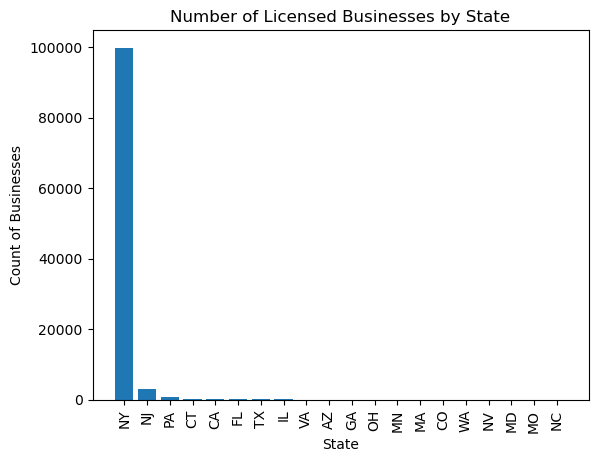

In [67]:
top_states = nyc_licensed_business_df['address_state'].value_counts().head(20)
plt.bar(top_states.index, top_states.values)
plt.title('Number of Licensed Businesses by State')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Count of Businesses')
plt.show()

In [68]:
nyc_licensed_business_df.isnull().sum()

license_number               0
license_type                 0
license_expiry_date          0
license_status               0
license_creation_date        0
industry                     0
business_name                0
address_city                 0
address_state                0
address_zip                370
address_building         37736
address_street_name      37368
address_borough          37550
longitude                44683
latitude                 44683
city_has_state               0
dtype: int64

### 10. Cleaning and Analyzing address_zip column

In [69]:
nyc_licensed_business_df['address_zip'].isnull().sum()

370

In [70]:
nyc_licensed_business_df['address_zip'] = nyc_licensed_business_df.groupby('address_city')['address_zip'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [71]:
nyc_licensed_business_df['address_zip'].isnull().sum()

328

In [72]:
nyc_licensed_business_df['address_zip'] = nyc_licensed_business_df.groupby('address_state')['address_zip'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [73]:
nyc_licensed_business_df['address_zip'] = nyc_licensed_business_df['address_zip'].fillna(nyc_licensed_business_df['address_zip'].mode()[0])


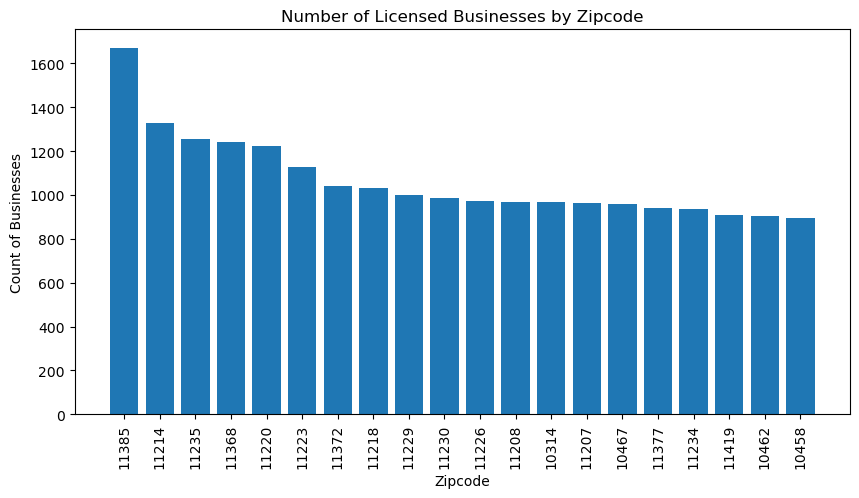

In [74]:
top_zipcodes = nyc_licensed_business_df['address_zip'].value_counts().head(20)
plt.figure(figsize=(10,5))
plt.bar(top_zipcodes.index, top_zipcodes.values)
plt.title('Number of Licensed Businesses by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count of Businesses')
plt.xticks(rotation=90)
plt.show()

In [75]:
nyc_licensed_business_df.isnull().sum()

license_number               0
license_type                 0
license_expiry_date          0
license_status               0
license_creation_date        0
industry                     0
business_name                0
address_city                 0
address_state                0
address_zip                  0
address_building         37736
address_street_name      37368
address_borough          37550
longitude                44683
latitude                 44683
city_has_state               0
dtype: int64

### 11. Cleaning and Analyzing address_building column

In [76]:
nyc_licensed_business_df['address_building'].fillna('unlnown', inplace=True)

In [77]:
nyc_licensed_business_df.isnull().sum()

license_number               0
license_type                 0
license_expiry_date          0
license_status               0
license_creation_date        0
industry                     0
business_name                0
address_city                 0
address_state                0
address_zip                  0
address_building             0
address_street_name      37368
address_borough          37550
longitude                44683
latitude                 44683
city_has_state               0
dtype: int64

### 12. Cleaning and Analyzing  address_street_name column

In [78]:
nyc_licensed_business_df['address_street_name'].value_counts()

BROADWAY         1812
JAMAICA AVE       887
3RD AVE           875
5TH AVE           853
ROOSEVELT AVE     634
                 ... 
WEBERS CT           1
ADAMS DR            1
E PULASKI RD        1
BARRY LN            1
37th avenue         1
Name: address_street_name, Length: 8434, dtype: int64

In [79]:
nyc_licensed_business_df['address_street_name'] = nyc_licensed_business_df.groupby('address_zip')['address_street_name'].apply(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan))

In [80]:
nyc_licensed_business_df['address_street_name'].isnull().sum()

1254

In [81]:
# Will name other streets as unknown
nyc_licensed_business_df['address_street_name'].fillna('unknown', inplace=True)

### 13. Cleaning and Analyzing address_borough column


In [82]:
nyc_licensed_business_df['address_borough'].isnull().sum()

37550

In [83]:
nyc_licensed_business_df['address_borough'].value_counts()

Brooklyn         18311
Queens           17231
Manhattan        13437
Bronx             9346
Outside NYC       6724
Staten Island     3442
MANHATTAN           46
QUEENS              17
BROOKLYN            15
BRONX                9
Name: address_borough, dtype: int64

In [84]:
# some values are same but are considered different because of alternative names and Capital letters
nyc_licensed_business_df['address_borough'] = nyc_licensed_business_df['address_borough'].replace('BROOKLYN', 'Brooklyn')
nyc_licensed_business_df['address_borough'] = nyc_licensed_business_df['address_borough'].replace('MANHATTAN', 'Manhattan')
nyc_licensed_business_df['address_borough'] = nyc_licensed_business_df['address_borough'].replace('QUEENS', 'Queens')
nyc_licensed_business_df['address_borough'] = nyc_licensed_business_df['address_borough'].replace('BRONX', 'Bronx')

In [85]:
nyc_licensed_business_df['address_borough'] = nyc_licensed_business_df.groupby('address_zip')['address_borough'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))


In [86]:
nyc_licensed_business_df['address_borough'].isnull().sum()

0

In [87]:
nyc_licensed_business_df['address_borough'].value_counts()

Brooklyn         26760
Queens           25732
Manhattan        18270
Outside NYC      14551
Bronx            14121
Staten Island     5420
Unknown           1274
Name: address_borough, dtype: int64

<AxesSubplot:>

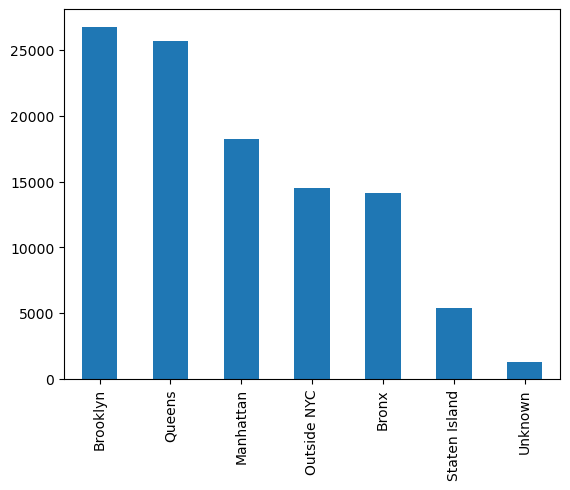

In [88]:
# Check the distribution of boroughs
nyc_licensed_business_df['address_borough'].value_counts().plot(kind='bar')

In [89]:
nyc_licensed_business_df.isnull().sum()

license_number               0
license_type                 0
license_expiry_date          0
license_status               0
license_creation_date        0
industry                     0
business_name                0
address_city                 0
address_state                0
address_zip                  0
address_building             0
address_street_name          0
address_borough              0
longitude                44683
latitude                 44683
city_has_state               0
dtype: int64

### 14. Cleaning and Analyzing lattitude and longitude column


In [90]:
# Impute missing latitude and longitude using median values by zip code
nyc_licensed_business_df['latitude'] = nyc_licensed_business_df.groupby('address_zip')['latitude'].transform(lambda x: x.fillna(x.median()))
nyc_licensed_business_df['longitude'] = nyc_licensed_business_df.groupby('address_zip')['longitude'].transform(lambda x: x.fillna(x.median()))


In [91]:
nyc_licensed_business_df.isnull().sum()

license_number              0
license_type                0
license_expiry_date         0
license_status              0
license_creation_date       0
industry                    0
business_name               0
address_city                0
address_state               0
address_zip                 0
address_building            0
address_street_name         0
address_borough             0
longitude                8330
latitude                 8330
city_has_state              0
dtype: int64

In [92]:
nyc_licensed_business_df['latitude'] = nyc_licensed_business_df.groupby('address_street_name')['latitude'].transform(lambda x: x.fillna(x.median()))
nyc_licensed_business_df['longitude'] = nyc_licensed_business_df.groupby('address_street_name')['longitude'].transform(lambda x: x.fillna(x.median()))


In [93]:
nyc_licensed_business_df.isnull().sum()

license_number              0
license_type                0
license_expiry_date         0
license_status              0
license_creation_date       0
industry                    0
business_name               0
address_city                0
address_state               0
address_zip                 0
address_building            0
address_street_name         0
address_borough             0
longitude                6220
latitude                 6220
city_has_state              0
dtype: int64

In [94]:
nyc_licensed_business_df['latitude'] = nyc_licensed_business_df.groupby('address_city')['latitude'].transform(lambda x: x.fillna(x.median()))
nyc_licensed_business_df['longitude'] = nyc_licensed_business_df.groupby('address_city')['longitude'].transform(lambda x: x.fillna(x.median()))


In [95]:
nyc_licensed_business_df.isnull().sum()

license_number              0
license_type                0
license_expiry_date         0
license_status              0
license_creation_date       0
industry                    0
business_name               0
address_city                0
address_state               0
address_zip                 0
address_building            0
address_street_name         0
address_borough             0
longitude                3393
latitude                 3393
city_has_state              0
dtype: int64

In [96]:
nyc_licensed_business_df['latitude'] = nyc_licensed_business_df.groupby('address_borough')['latitude'].transform(lambda x: x.fillna(x.median()))
nyc_licensed_business_df['longitude'] = nyc_licensed_business_df.groupby('address_borough')['longitude'].transform(lambda x: x.fillna(x.median()))


In [97]:
nyc_licensed_business_df.isnull().sum()

license_number           0
license_type             0
license_expiry_date      0
license_status           0
license_creation_date    0
industry                 0
business_name            0
address_city             0
address_state            0
address_zip              0
address_building         0
address_street_name      0
address_borough          0
longitude                0
latitude                 0
city_has_state           0
dtype: int64

## IV. Visualization and Analysis

### 1. Top 10 Industries with the Most Licensed Businesses

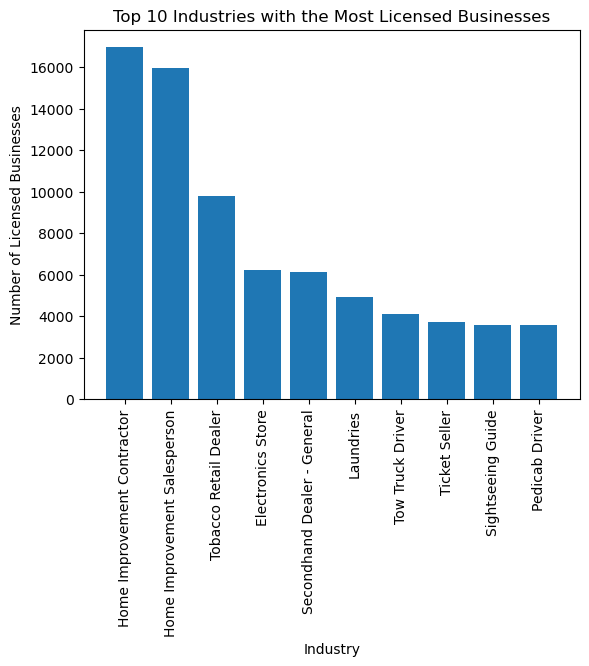

In [98]:
top_10_industries = nyc_licensed_business_df['industry'].value_counts().head(10)

plt.bar(top_10_industries.index, top_10_industries.values)
plt.xticks(rotation=90)
plt.title('Top 10 Industries with the Most Licensed Businesses')
plt.xlabel('Industry')
plt.ylabel('Number of Licensed Businesses')
plt.show()


In [99]:
top_10_industries

Home Improvement Contractor     16967
Home Improvement Salesperson    15969
Tobacco Retail Dealer            9815
Electronics Store                6254
Secondhand Dealer - General      6122
Laundries                        4952
Tow Truck Driver                 4096
Ticket Seller                    3737
Sightseeing Guide                3603
Pedicab Driver                   3580
Name: industry, dtype: int64

### 2. Distribution of License Statuses

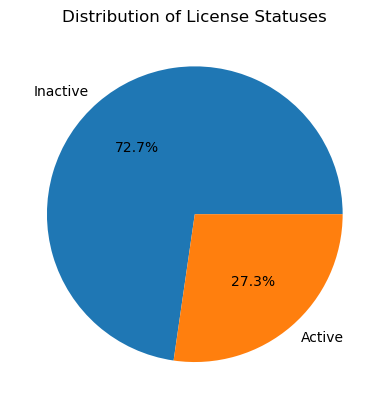

In [100]:
license_status_counts = nyc_licensed_business_df['license_status'].value_counts()

plt.pie(license_status_counts.values, labels=license_status_counts.index, autopct='%1.1f%%')
plt.title('Distribution of License Statuses')
plt.show()

In [101]:
license_status_counts

Inactive    77166
Active      28962
Name: license_status, dtype: int64

### 3. Relationship between Top 10 Industries and License Status

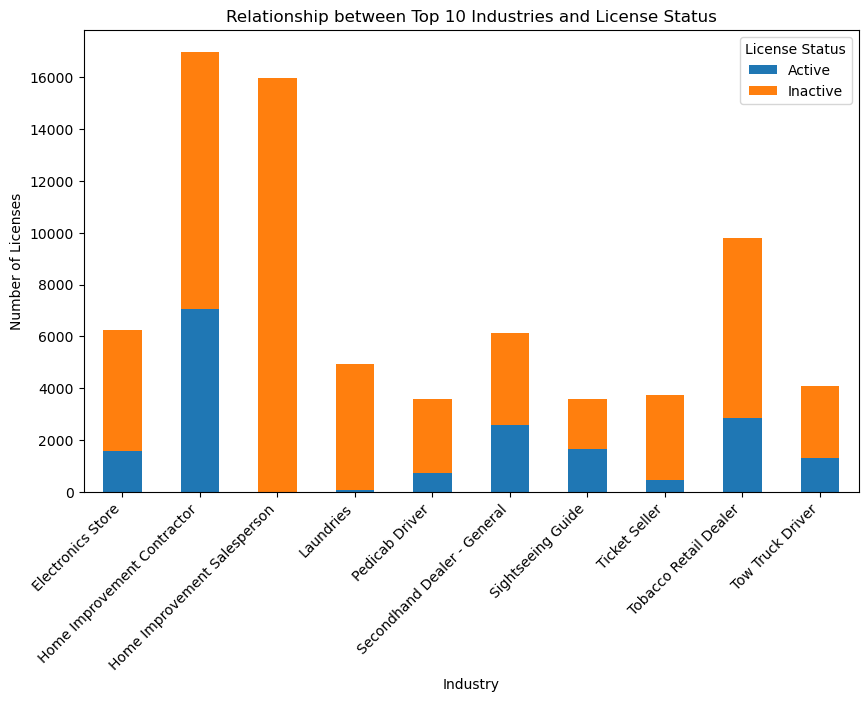

In [102]:
import matplotlib.pyplot as plt
import pandas as pd

# create a subset of data with only the top 10 industries
top_industries = nyc_licensed_business_df['industry'].value_counts().head(10).index
df_subset = nyc_licensed_business_df[nyc_licensed_business_df['industry'].isin(top_industries)]

# create a crosstab of industry and license status
industry_license_status = pd.crosstab(df_subset['industry'], df_subset['license_status'])

# create a stacked bar chart
industry_license_status.plot(kind='bar', stacked=True, figsize=(10, 6))

# set labels and title
plt.title('Relationship between Top 10 Industries and License Status')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Licenses')
plt.legend(title='License Status', loc='upper right')

plt.show()


In [103]:
industry_license_status

license_status,Active,Inactive
industry,,
Electronics Store,1602,4652
Home Improvement Contractor,7052,9915
Home Improvement Salesperson,0,15969
Laundries,83,4869
Pedicab Driver,739,2841
Secondhand Dealer - General,2599,3523
Sightseeing Guide,1654,1949
Ticket Seller,471,3266
Tobacco Retail Dealer,2869,6946


### 4. Relationship between Top 10 Industries and Address Borough

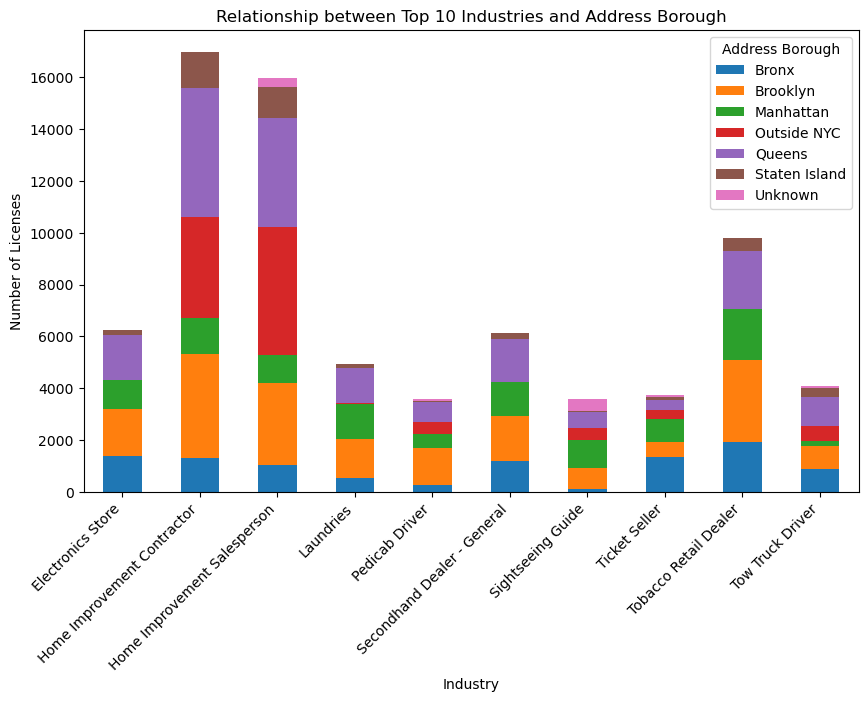

In [104]:
import matplotlib.pyplot as plt
import pandas as pd

# create a subset of data with only the top 10 industries
top_industries = nyc_licensed_business_df['industry'].value_counts().head(10).index
df_subset = nyc_licensed_business_df[nyc_licensed_business_df['industry'].isin(top_industries)]

# create a crosstab of industry and license status
industry_license_status = pd.crosstab(df_subset['industry'], df_subset['address_borough'])

# create a stacked bar chart
industry_license_status.plot(kind='bar', stacked=True, figsize=(10, 6))

# set labels and title
plt.title('Relationship between Top 10 Industries and Address Borough')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Licenses')
plt.legend(title='Address Borough', loc='upper right')

plt.show()


In [105]:
industry_license_status

address_borough,Bronx,Brooklyn,Manhattan,Outside NYC,Queens,Staten Island,Unknown
industry,,,,,,,
Electronics Store,1373,1831,1122,11,1705,212,0
Home Improvement Contractor,1329,3997,1390,3895,4959,1390,7
Home Improvement Salesperson,1036,3174,1083,4928,4199,1194,355
Laundries,551,1500,1349,43,1332,177,0
Pedicab Driver,276,1437,517,457,792,31,70
Secondhand Dealer - General,1198,1719,1332,7,1645,221,0
Sightseeing Guide,124,786,1095,449,625,53,471
Ticket Seller,1359,577,862,380,390,100,69
Tobacco Retail Dealer,1940,3146,1976,5,2242,506,0


### 5. Top 10 license types in each address_states

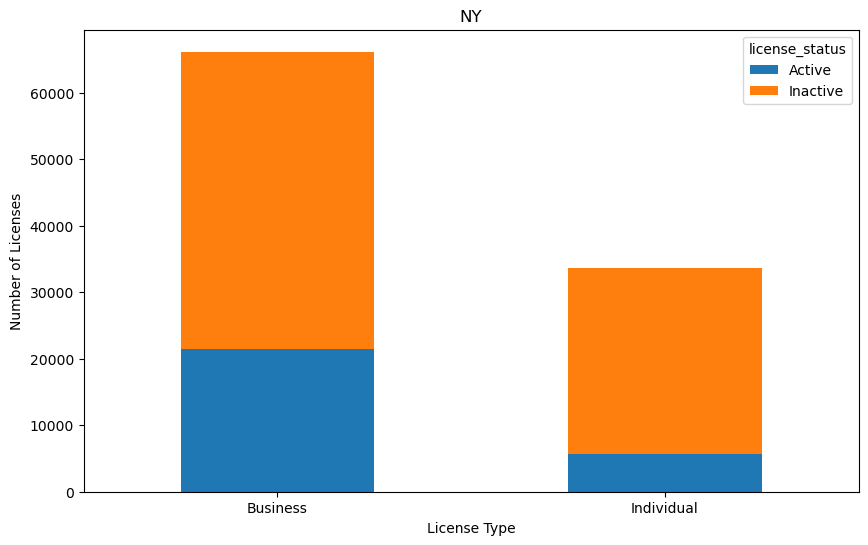

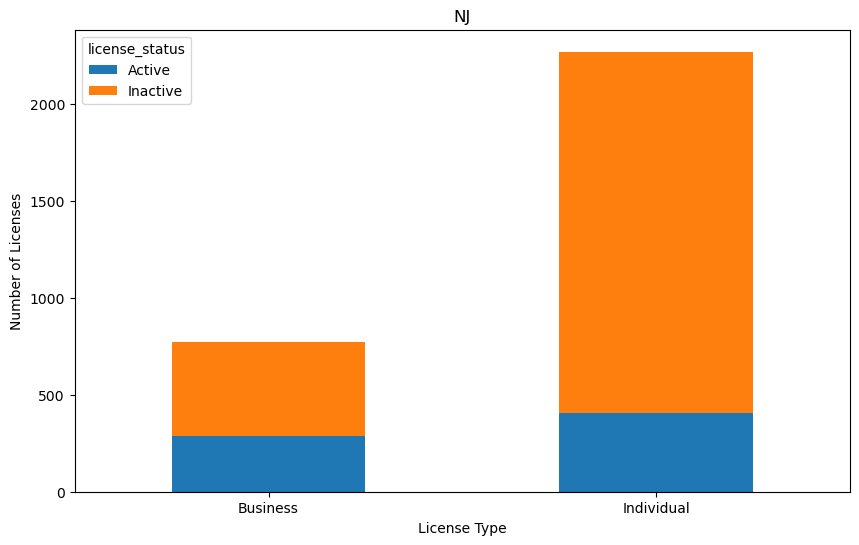

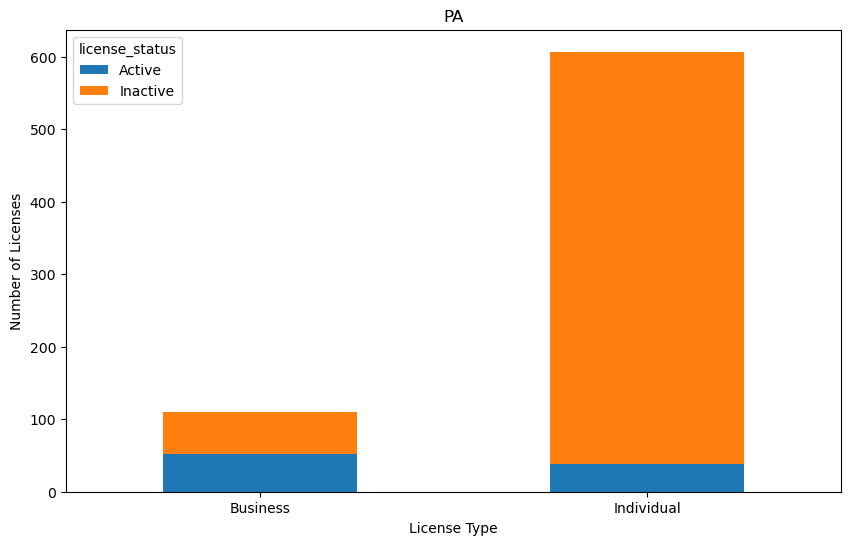

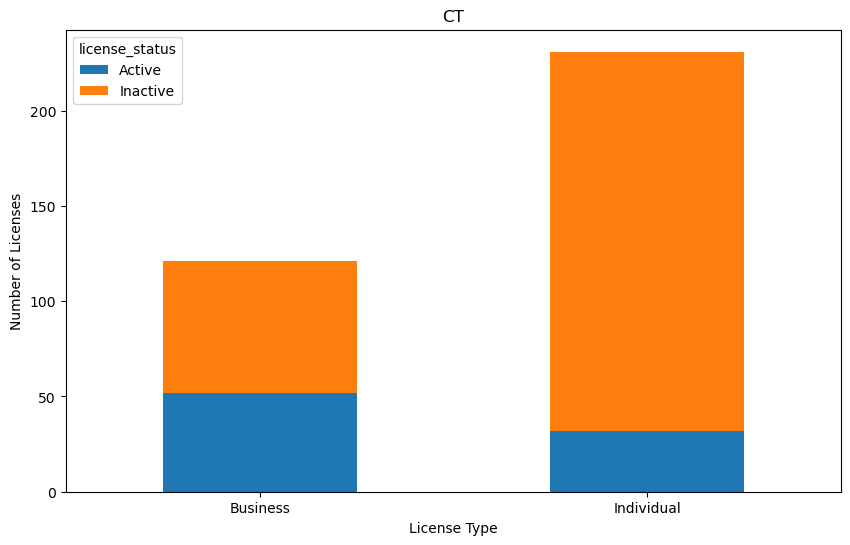

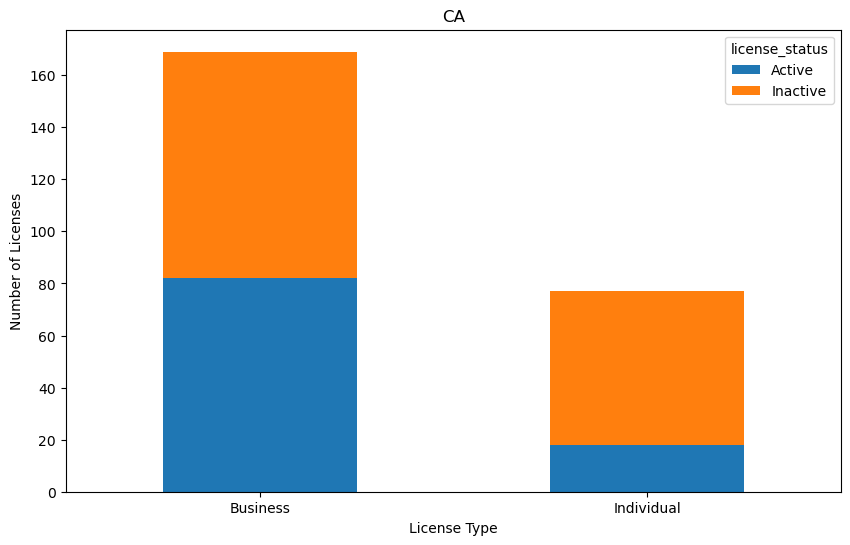

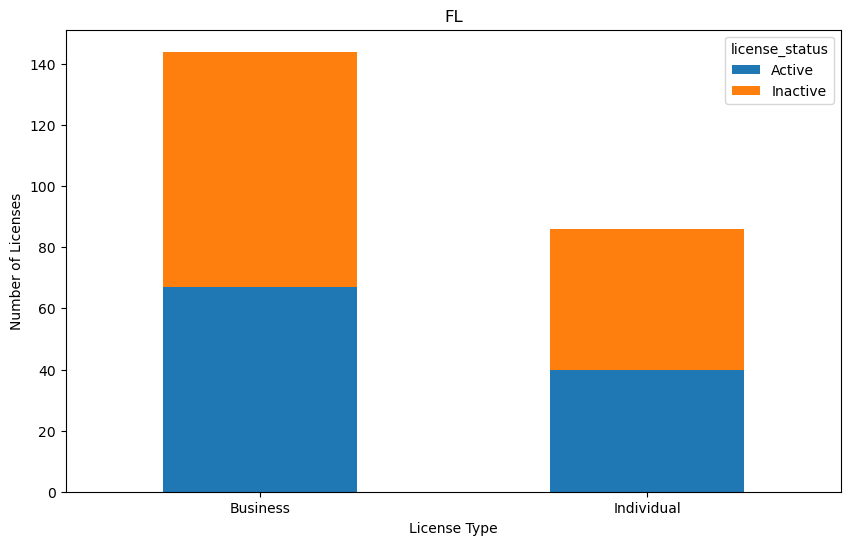

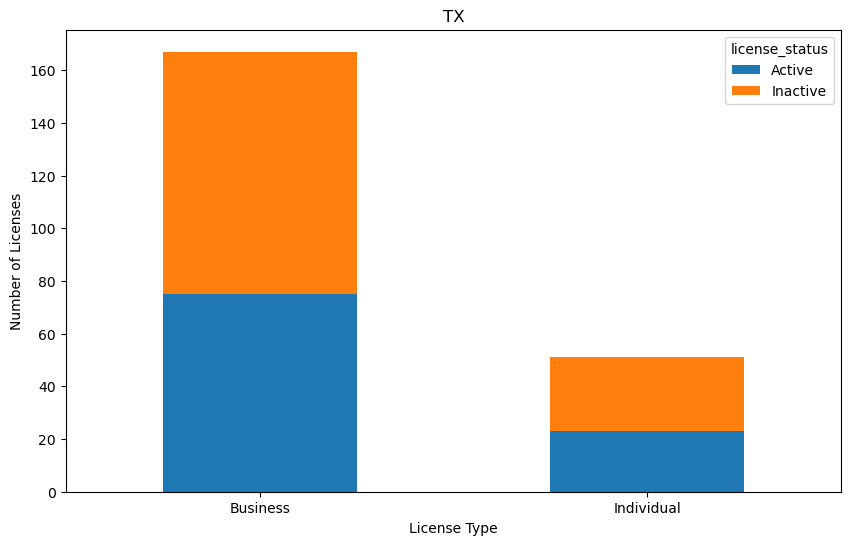

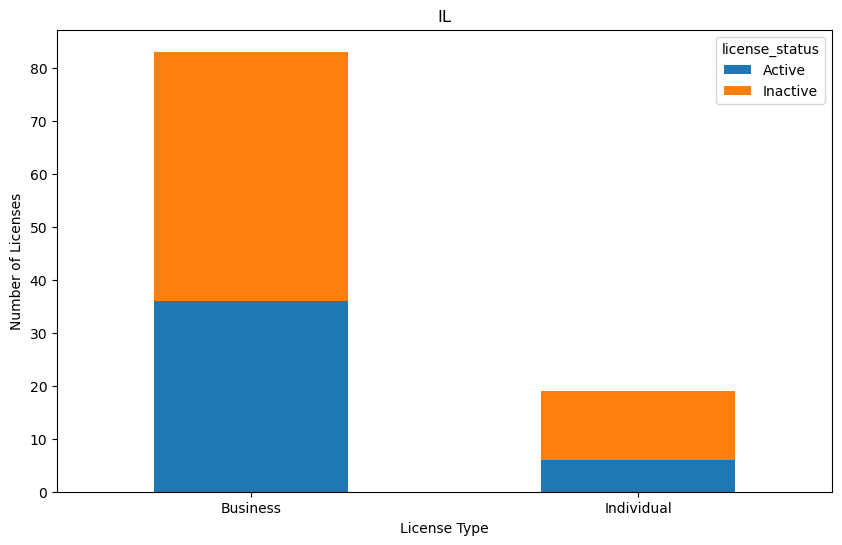

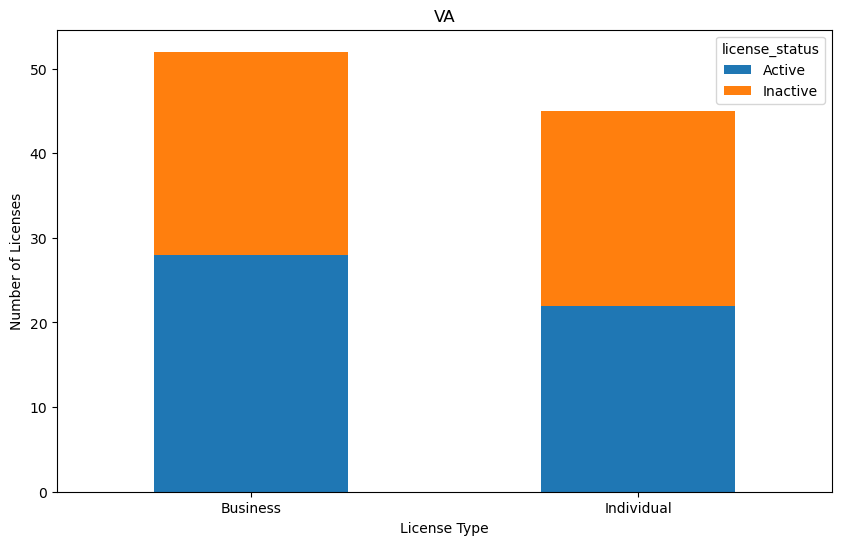

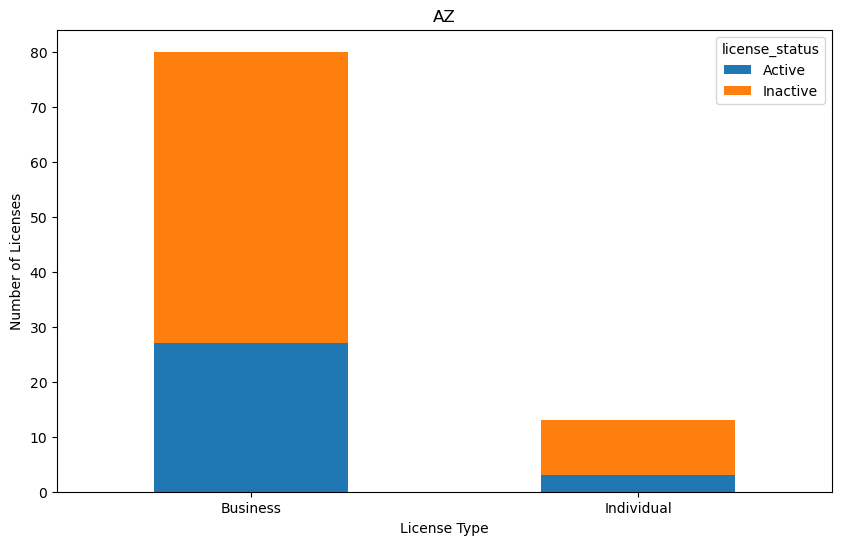

In [106]:
top_states = nyc_licensed_business_df['address_state'].value_counts().head(10).index.tolist()

df_top_states = nyc_licensed_business_df[nyc_licensed_business_df['address_state'].isin(top_states)]

pivot_table = pd.pivot_table(df_top_states, index=['address_state', 'license_type'], columns='license_status', values='license_number', aggfunc='count', fill_value=0)

for state in top_states:
    pivot_table.loc[state].plot(kind='bar', stacked=True, title=f'{state}', rot=0, figsize=(10, 6))
    plt.xlabel('License Type')
    plt.ylabel('Number of Licenses')
    plt.show()


### 6. Grouping of the data by license type and count the number of licenses for each status

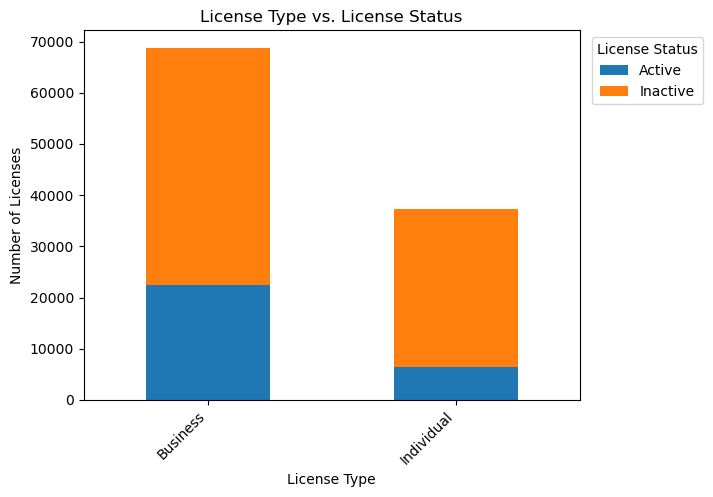

In [107]:
license_type_status_df = nyc_licensed_business_df.groupby(['license_type', 'license_status']).size().unstack(fill_value=0)

license_type_status_df.plot(kind='bar', stacked=True)

plt.title('License Type vs. License Status')
plt.xlabel('License Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Licenses')
plt.legend(title='License Status', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.show()


### 7. Removing of outliers of Latitude and Longitude 

In [108]:
import numpy as np

# calculate the IQR for latitude and longitude
nyc_licensed_business_df['latitude'] = nyc_licensed_business_df['latitude'].astype(float)
nyc_licensed_business_df['longitude'] = nyc_licensed_business_df['longitude'].astype(float)

lat_iqr = np.percentile(nyc_licensed_business_df['latitude'], 75) - np.percentile(nyc_licensed_business_df['latitude'], 25)
long_iqr = np.percentile(nyc_licensed_business_df['longitude'], 75) - np.percentile(nyc_licensed_business_df['longitude'], 25)

# calculate the lower and upper bounds for latitude and longitude
lat_lower_bound = np.percentile(nyc_licensed_business_df['latitude'], 25) - 1.5 * lat_iqr
lat_upper_bound = np.percentile(nyc_licensed_business_df['latitude'], 75) + 1.5 * lat_iqr
long_lower_bound = np.percentile(nyc_licensed_business_df['longitude'], 25) - 1.5 * long_iqr
long_upper_bound = np.percentile(nyc_licensed_business_df['longitude'], 75) + 1.5 * long_iqr

# remove outliers for both latitude and longitude
nyc_licensed_business_df = nyc_licensed_business_df[(nyc_licensed_business_df['latitude'] > lat_lower_bound) & 
                                                    (nyc_licensed_business_df['latitude'] < lat_upper_bound) &
                                                    (nyc_licensed_business_df['longitude'] > long_lower_bound) &
                                                    (nyc_licensed_business_df['longitude'] < long_upper_bound)]


### 8. NYC Licensed Businesses by Borough

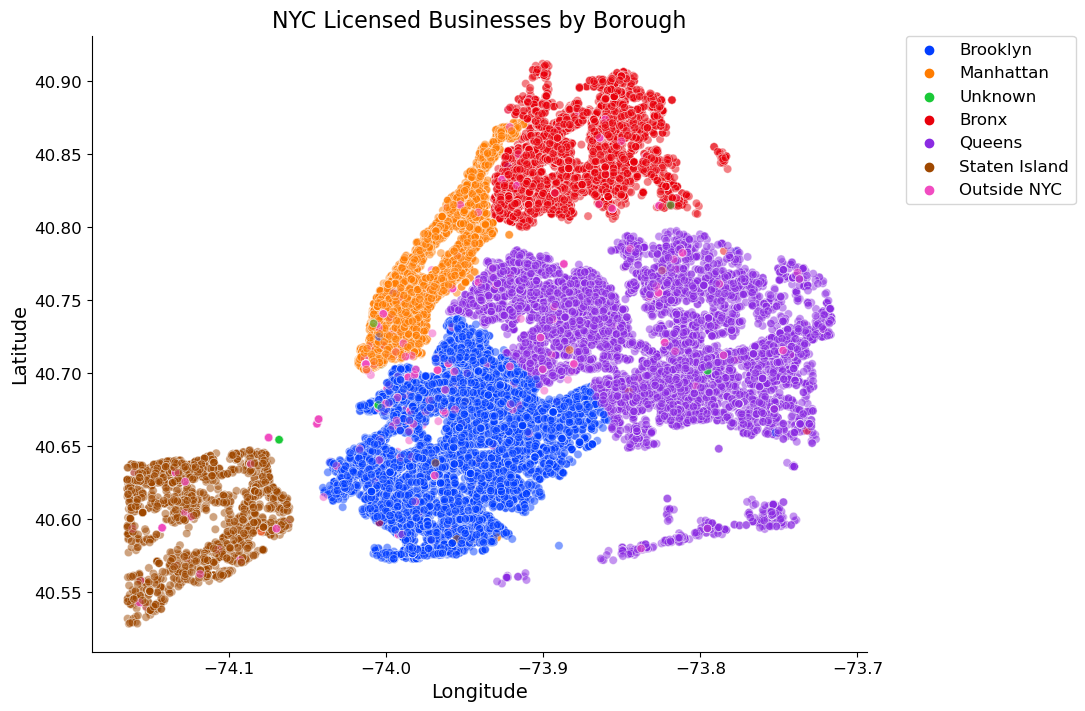

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# create a scatter plot for latitude and longitude
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=nyc_licensed_business_df, hue='address_borough', palette='bright', alpha=0.5)

# set plot title and axes labels
plt.title('NYC Licensed Businesses by Borough', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('Latitude', fontsize=14)
plt.yticks(fontsize=12)

# remove top and right spines
sns.despine()

# add legend and adjust its position
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)


### 9. NYC Business Licenses by Latitude and Longitude and Status

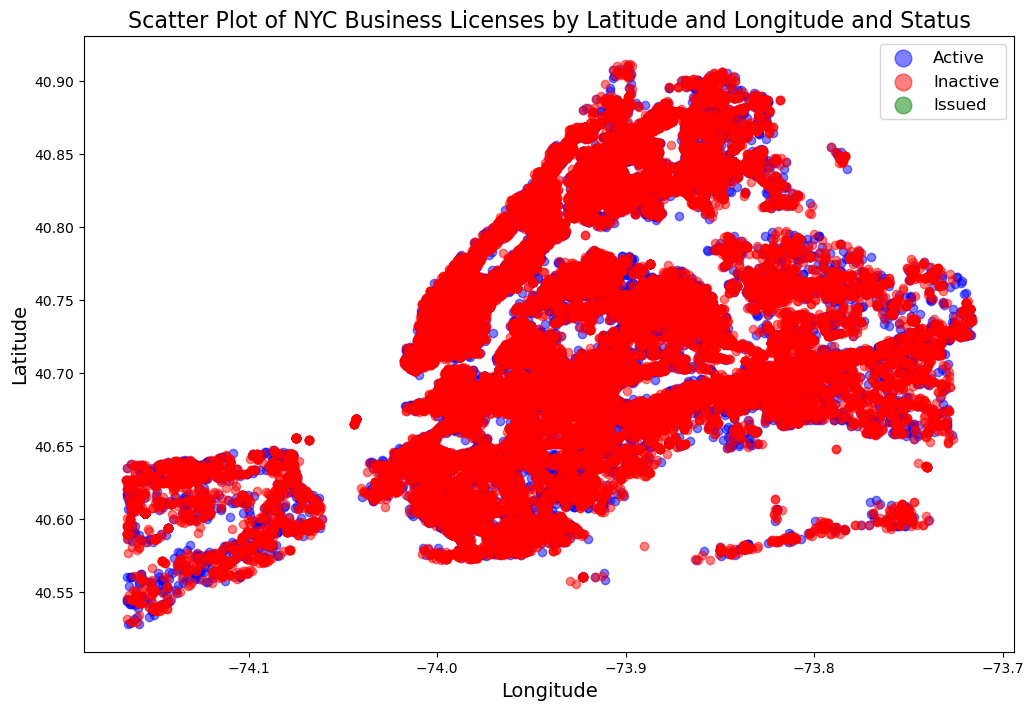

In [110]:
import matplotlib.pyplot as plt
import pandas as pd


# Drop rows with missing latitude or longitude values
nyc_licensed_business_df.dropna(subset=['latitude', 'longitude'], inplace=True)

# Remove outlier values
nyc_licensed_business_df = nyc_licensed_business_df[(nyc_licensed_business_df['latitude'] > 40) & (nyc_licensed_business_df['longitude'] < -73)]

# Create a color dictionary for license status
status_colors = {'Active': 'blue', 'Inactive': 'red', 'Issued': 'green'}

# Create a scatter plot of latitude and longitude with color-coded points based on license status
fig, ax = plt.subplots(figsize=(12, 8))
for status, color in status_colors.items():
    temp_df = nyc_licensed_business_df[nyc_licensed_business_df['license_status'] == status]
    ax.scatter(temp_df['longitude'], temp_df['latitude'], c=color, alpha=0.5, label=status)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
ax.set_title('Scatter Plot of NYC Business Licenses by Latitude and Longitude and Status', fontsize=16)
ax.legend(fontsize=12, markerscale=2)
plt.show()


### 10. Top 5 Industries by Location

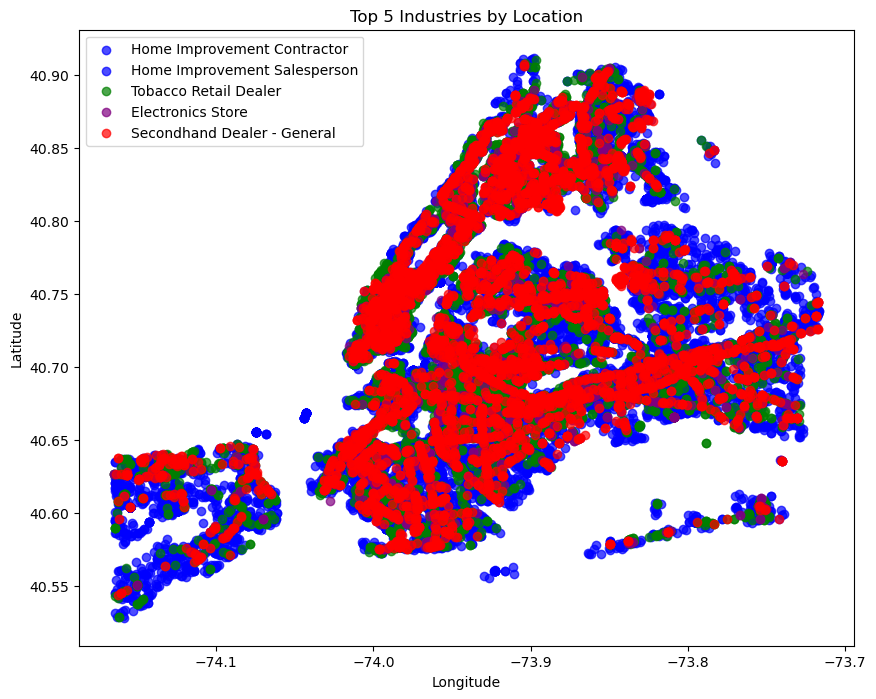

In [111]:
import matplotlib.pyplot as plt

# Define colors for each industry
color_map = {"Home Improvement Contractor": "blue", "Home Improvement Salesperson": "blue", "Tobacco Retail Dealer": "green", "Electronics Store": "purple", "Secondhand Dealer - General": "red"}

# Create a scatter plot with the data
fig, ax = plt.subplots(figsize=(10, 8))

for industry, color in color_map.items():
    industry_data = nyc_licensed_business_df[nyc_licensed_business_df["industry"] == industry]
    ax.scatter(
        industry_data["longitude"].astype(float),
        industry_data["latitude"].astype(float),
        color=color,
        label=industry,
        alpha=0.7
    )

# Add a legend and labels to the plot
ax.legend()
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Top 5 Industries by Location")

plt.show()


## V. Storing preprocessed data back to Mongo DB

In [112]:
insert_nyc_business_data_to_db(json.loads(nyc_licensed_business_df.to_json(orient='records')), 'newyork_businesses_db', 'preprocessed_newyork_business')